In [52]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
#linearier for model buildings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
#getting the data
df=pd.read_csv("/content/weather_forecast_data.csv")

In [55]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [57]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [58]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


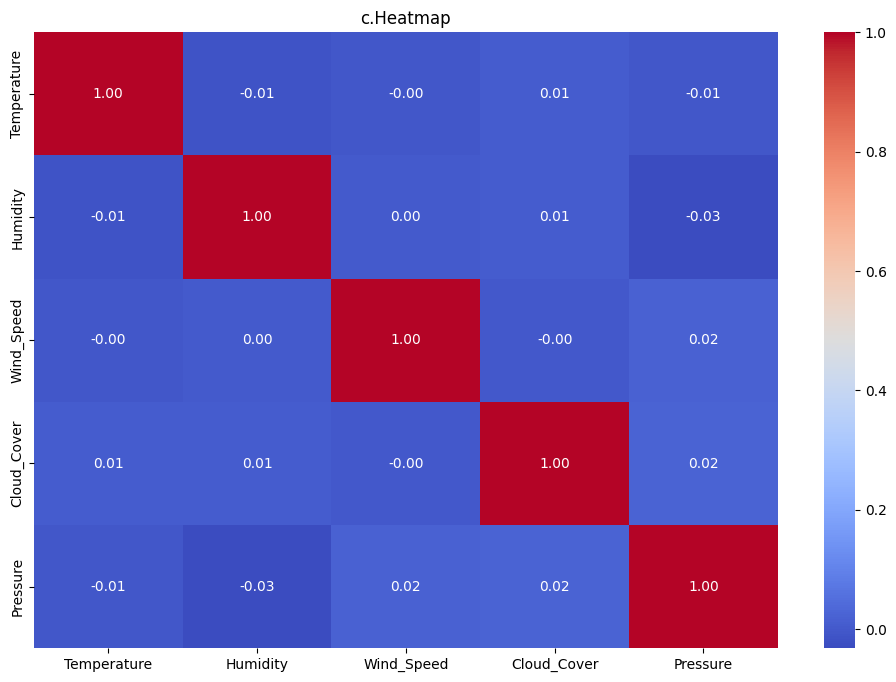

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("c.Heatmap")
plt.show()

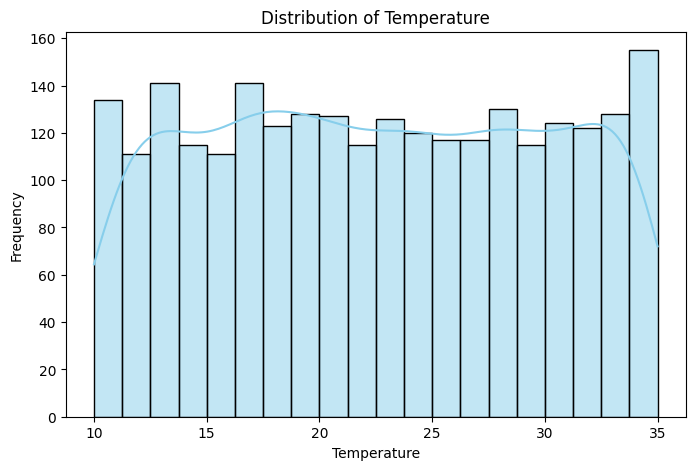

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

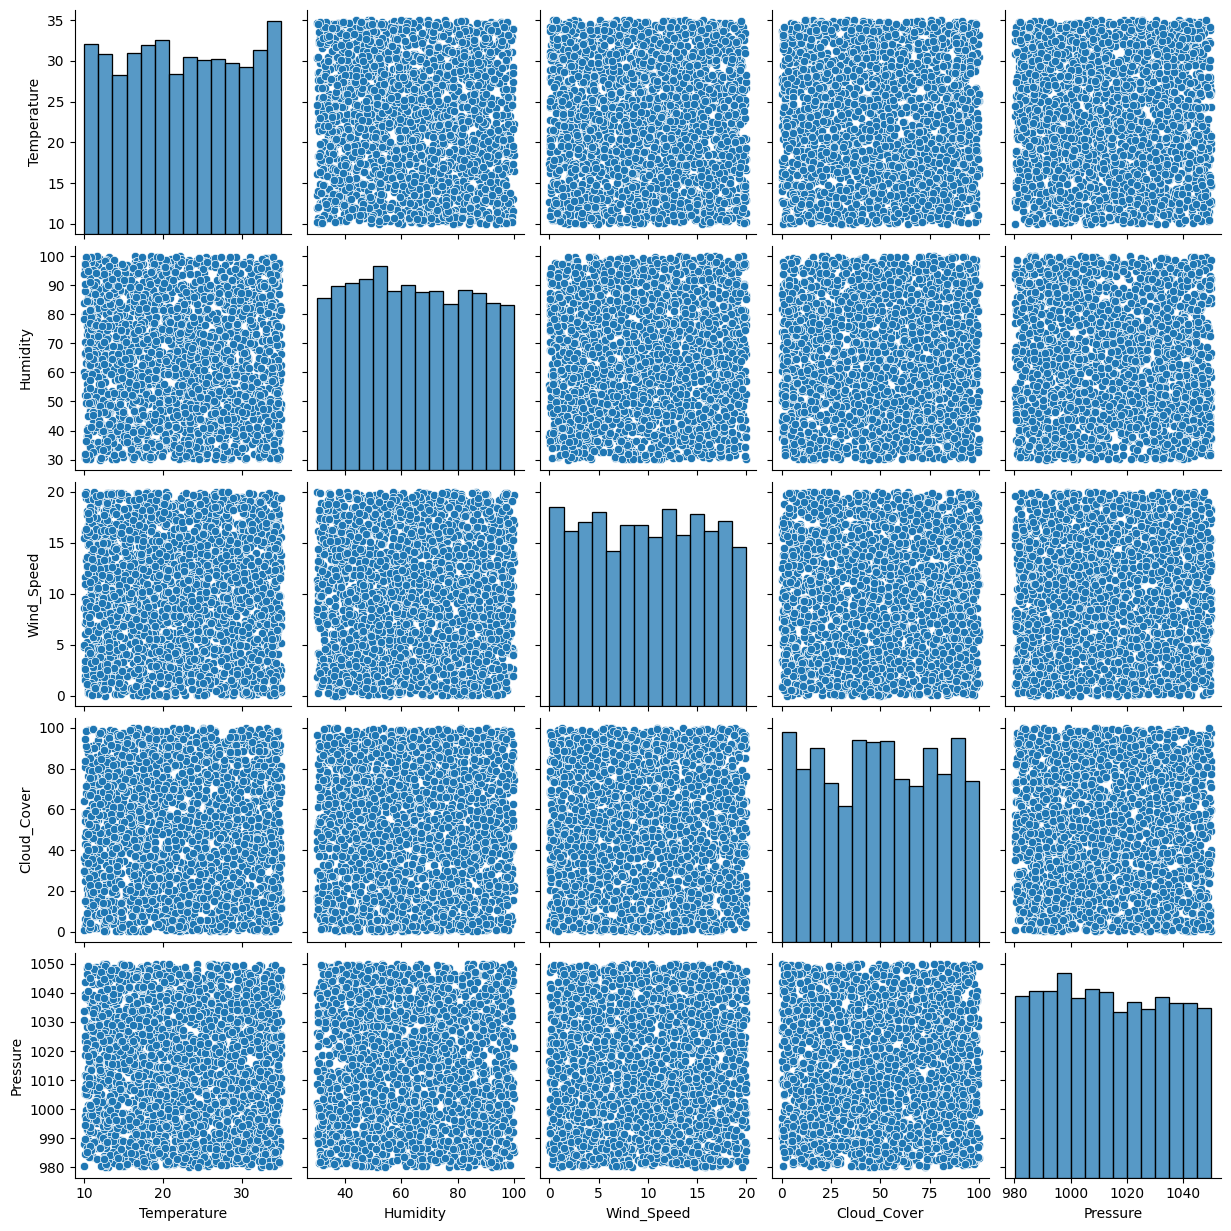

In [62]:
numeric_feature=['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
sns.pairplot(df[numeric_feature])
plt.show()

In [64]:
#features selection
features=['Humidity','Wind_Speed']
x=df[features]
y=df['Temperature']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [66]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 23.112885486246682
Coefficient: [-0.00492661 -0.01946183]


In [68]:
y_pred=model.predict(x_test)

In [69]:
y_pred

array([22.59568485, 22.58052793, 22.76599548, 22.50645783, 22.73810435,
       22.44303586, 22.65492765, 22.79045957, 22.52301938, 22.52358688,
       22.62787536, 22.48771325, 22.28590579, 22.8659511 , 22.58831729,
       22.58387264, 22.76994582, 22.67624996, 22.5122835 , 22.53087254,
       22.61016892, 22.56398224, 22.6330286 , 22.64685807, 22.50662588,
       22.70003707, 22.52019195, 22.82447999, 22.74109933, 22.656972  ,
       22.5190121 , 22.77112171, 22.44556156, 22.77224917, 22.4916663 ,
       22.34471754, 22.71273511, 22.54164208, 22.73119646, 22.4120112 ,
       22.38386618, 22.39796473, 22.93530324, 22.66814277, 22.55946778,
       22.74446642, 22.67692345, 22.49452122, 22.51235758, 22.71753105,
       22.32280454, 22.63156195, 22.71715239, 22.65741413, 22.35846217,
       22.81831489, 22.36055276, 22.62063453, 22.62352349, 22.70642769,
       22.46651181, 22.54440439, 22.57275667, 22.83014054, 22.62156003,
       22.48289071, 22.4306814 , 22.33493801, 22.43284575, 22.55

In [70]:
mse=mean_squared_error(y_test,y_pred)

In [71]:
mse

51.882451021059765

In [72]:
r2=r2_score(y_test,y_pred)

In [73]:
r2

-0.0013155048490205434

#UNDERFITTING


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [75]:
np.random.seed(42)
x=np.linspace(-3,3,80).reshape(-1,1)
y=2*x**2+3*x+5+np.random.randn(80,1)*3

In [76]:
lr=LinearRegression()
lr.fit(x,y)
y_pred_lr=lr.predict(x)

In [77]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

poly_lr=LinearRegression()
poly_lr.fit(x_poly,y)
y_pred_poly=poly_lr.predict(x_poly)

In [78]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

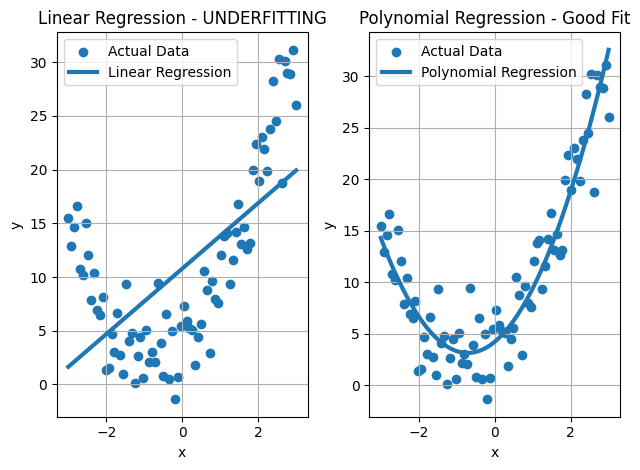

In [79]:
plt.subplot(1,2,1)
plt.scatter(x,y,label="Actual Data")
plt.plot(x,y_pred_lr,label="Linear Regression",linewidth=3)
plt.title("Linear Regression - UNDERFITTING")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x,y,label="Actual Data")
plt.plot(x,y_pred_poly,label="Polynomial Regression",linewidth=3)
plt.title("Polynomial Regression - Good Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Overfitting

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [81]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [82]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [83]:
print("Dataset loaded successfully!")
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Dataset loaded successfully!
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


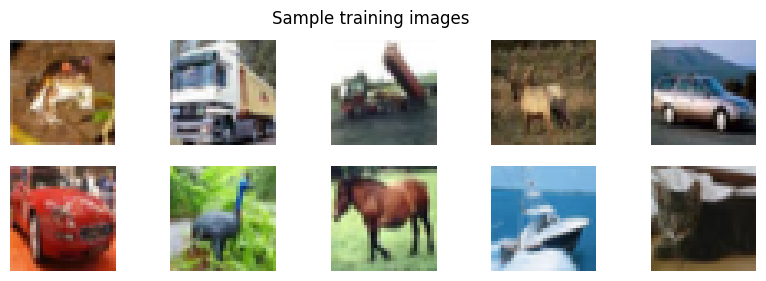

In [84]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.axis("off")
plt.suptitle("Sample training images")
plt.show()

In [85]:
samll_model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
samll_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_small=samll_model.fit(
    x_train,y_train,
    epochs=5,
    validation_data=(x_test,y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3967 - loss: 1.6646 - val_accuracy: 0.5800 - val_loss: 1.1749
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.6169 - loss: 1.1017 - val_accuracy: 0.6403 - val_loss: 1.0304
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6656 - loss: 0.9544 - val_accuracy: 0.6631 - val_loss: 0.9740
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.7005 - loss: 0.8584 - val_accuracy: 0.6648 - val_loss: 0.9654
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7294 - loss: 0.7803 - val_accuracy: 0.6927 - val_loss: 0.8983


In [86]:
big_model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), # Add Flatten layer here
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.0), #intentionally removed regularization
    layers.Dense(10,activation='softmax')
])
big_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_big=big_model.fit(
    x_train,y_train,
    epochs=10,
    validation_data=(x_test,y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 115ms/step - accuracy: 0.3135 - loss: 1.8463 - val_accuracy: 0.5234 - val_loss: 1.3103
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 112ms/step - accuracy: 0.5541 - loss: 1.2268 - val_accuracy: 0.6239 - val_loss: 1.0657
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 111ms/step - accuracy: 0.6505 - loss: 0.9870 - val_accuracy: 0.6870 - val_loss: 0.8860
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 113ms/step - accuracy: 0.6947 - loss: 0.8567 - val_accuracy: 0.7056 - val_loss: 0.8409
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.7298 - loss: 0.7654 - val_accuracy: 0.7030 - val_loss: 0.8661
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.7489 - loss: 0.7093 - val_accuracy: 0.7267 - val_loss: 0.7997
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 112ms/step - accuracy: 0.7742 - loss: 0.6407 - val_accuracy: 0.7304 - val_loss: 0.7870
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - ac

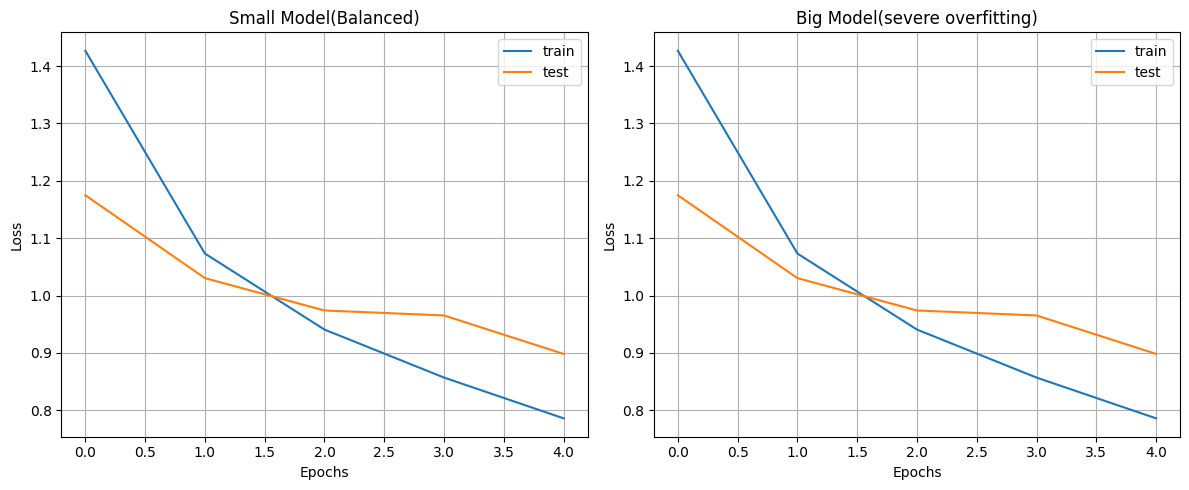

In [87]:
plt.figure(figsize=(12,5))

# SMALL MODEL
plt.subplot(1,2,1)
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title("Small Model(Balanced)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.grid(True)

#BIG MODEL
plt.subplot(1,2,2)
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title("Big Model(severe overfitting)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.grid(True)

plt.tight_layout()
plt.show()

LOSS FUNCTION

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
np.random.seed(42)
x = np.linspace(0,10,50).reshape(-1,1)
y = 3 * x + 5 + np.random.normal(0, 3, 50).reshape(-1,1)

In [90]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [91]:
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)

In [92]:
print("---loss values---")
print("MAE:   ",MAE)
print("MSE:   ",MSE)
print("RMSE:   ",RMSE);
print("R2",r2_score(y,y_pred))

---loss values---
MAE:    2.2235308318513334
MSE:    7.426276156000418
RMSE:    2.725119475546057
R2 0.9031743908043623


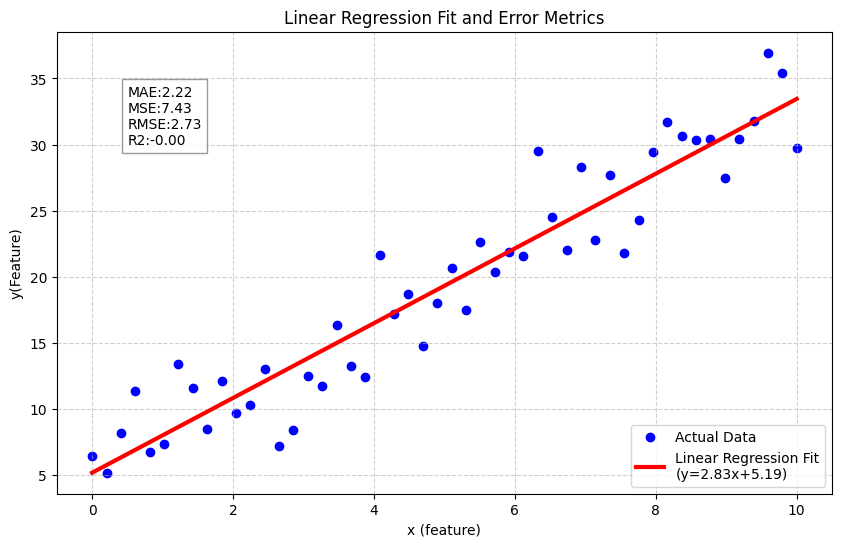

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,label="Actual Data",color='blue')
plt.plot(x,y_pred,color='red',linewidth=3,label=f'Linear Regression Fit\n(y={model.coef_[0][0]:.2f}x+{model.intercept_[0]:.2f})')
plt.title("Linear Regression Fit and Error Metrics")
plt.xlabel("x (feature)")
plt.ylabel("y(Feature)")
plt.text(0.5,30,f'MAE:{MAE:.2f}\nMSE:{MSE:.2f}\nRMSE:{RMSE:.2f}\nR2:{r2:.2f}',
         bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray'),
         fontsize=10)
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()